In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("data.csv", header=None)

In [3]:
data

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1
...,...,...,...
95,0.77029,0.701400,0
96,0.73156,0.717820,0
97,0.44556,0.579910,0
98,0.85275,0.859870,0


In [4]:
X = np.array(data[[0,1]])

In [5]:
y = np.array(data[2])

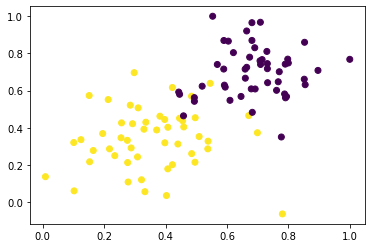

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
# Probability and score
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features,weights)+bias)

In [9]:
# Cross entropy formula
def error_formula(y, output):
    return -y*np.log(output) - (1-y)*np.log(1-output)

In [10]:
def update_weights(x, y, weights, bias, learning_rate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights = weights + learning_rate*d_error*x
    bias = bias + learning_rate*d_error
    return weights, bias

In [11]:
X.shape


(100, 2)

In [12]:
weights = np.random.normal(size=X.shape[1])
bias = 0
out = output_formula(X, weights, bias)
loss = error_formula(y, out)

In [13]:
np.mean(out > 0.5)

0.09

In [14]:
out

array([0.56962388, 0.47815957, 0.50444691, 0.45885505, 0.48603385,
       0.50515319, 0.4710269 , 0.48674788, 0.46095898, 0.48032205,
       0.47997833, 0.45882612, 0.45541621, 0.47434136, 0.46620994,
       0.50221884, 0.505896  , 0.4870746 , 0.46350414, 0.46616282,
       0.47058362, 0.44745086, 0.46973303, 0.45934165, 0.49762406,
       0.41829805, 0.42540277, 0.47070899, 0.51726956, 0.49823825,
       0.45933393, 0.52584111, 0.43332933, 0.45134806, 0.46737316,
       0.47346754, 0.48146061, 0.45962258, 0.49204805, 0.49805884,
       0.46997854, 0.44563607, 0.50670695, 0.43958469, 0.49874385,
       0.47898687, 0.46902261, 0.44332809, 0.48919146, 0.48246527,
       0.39305814, 0.44483456, 0.4658596 , 0.41641497, 0.47969508,
       0.46116436, 0.43411177, 0.43444816, 0.47289637, 0.4394759 ,
       0.45621564, 0.44889513, 0.46039092, 0.44185563, 0.47548343,
       0.4399361 , 0.4524648 , 0.45320275, 0.50711954, 0.44549023,
       0.4093337 , 0.46145335, 0.41286093, 0.45027522, 0.46396

In [15]:
np.mean((out > 0.5) == y)

0.57

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
import time
np.random.seed(42)

epochs = 1000
learning_rate = 0.01

def train(train_features, train_targets, test_features, test_targets, epochs, learning_rate):
    weights = np.random.normal(size=train_features.shape[1])
    bias = 0
    errors = []
    test_errors = []
    for epoch in range(epochs):
        for x, y in zip(train_features, train_targets):
            output = output_formula(x, weights, bias)
            weights, bias = update_weights(x, y, weights, bias, learning_rate)
        # at the end of one epoch
        out = output_formula(train_features, weights, bias)
        loss = np.mean(error_formula(train_targets, out))
        errors.append(loss)
        out_test = output_formula(test_features, weights, bias)
        loss_test = np.mean(error_formula(test_targets, out_test))
        test_errors.append(loss_test)
        
        if epoch % 10 == 0:
            print("Epoch:", epoch)
            print("Train loss", loss)
            predictions = out > 0.5
            accuracy = np.mean(predictions == train_targets)
            print("Train Accuracy", accuracy)
            print("Test loss", loss_test)
            predictions = out_test > 0.5
            accuracy = np.mean(predictions == test_targets)
            print("Test Accuracy", accuracy)
        plt.plot(errors)
        plt.plot(test_errors)
        

Epoch: 0
Train loss 0.7117483654726598
Train Accuracy 0.3
Test loss 0.7023157933365239
Test Accuracy 0.3333333333333333
Epoch: 10
Train loss 0.6445552413143899
Train Accuracy 0.5428571428571428
Test loss 0.6430783262870947
Test Accuracy 0.5333333333333333
Epoch: 20
Train loss 0.6026193327619113
Train Accuracy 0.6571428571428571
Test loss 0.5857879311488109
Test Accuracy 0.7
Epoch: 30
Train loss 0.5661689745803781
Train Accuracy 0.7285714285714285
Test loss 0.5355808924857777
Test Accuracy 0.7666666666666667
Epoch: 40
Train loss 0.5344890307069269
Train Accuracy 0.8
Test loss 0.4926844780546056
Test Accuracy 0.8333333333333334
Epoch: 50
Train loss 0.5068603906363078
Train Accuracy 0.8571428571428571
Test loss 0.4559483119987321
Test Accuracy 0.9
Epoch: 60
Train loss 0.48265857397336703
Train Accuracy 0.9
Test loss 0.424317133089469
Test Accuracy 0.9333333333333333
Epoch: 70
Train loss 0.46135690060216106
Train Accuracy 0.9285714285714286
Test loss 0.39691477758871624
Test Accuracy 0.933

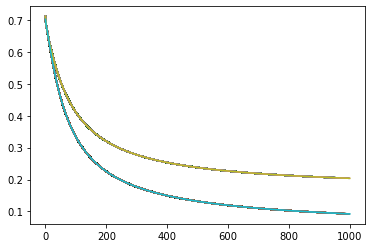

In [18]:
train(X_train, y_train, X_test, y_test, epochs, learning_rate)